In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
data = pd.read_csv("Rubric_vordlus.csv")

In [3]:
data

,Mudel,Train_kadu,Val_kadu,Precision,Recall,F1,Accuracy,Epohh
0,100K,1.3934,1.062021,0.662662,0.641558,0.643920,0.641558442,epohh-1
1,100K,0.8318,0.968560,0.684159,0.677922,0.676076,"0.6779220779220779,",epohh-2
2,100K,0.5606,0.933608,0.707963,0.706494,0.706817,0.706493506,epohh-3
3,100K,NaN,NaN,0.671710,0.658442,0.662943,0.658441558,test
4,200K,1.3042,0.978424,0.714665,0.680519,0.687489,0.680519481,epohh-1
5,200K,0.7835,0.897604,0.702696,0.701299,0.699111,0.701298701,epohh-2
6,200K,0.5632,0.891840,0.715439,0.706494,0.708949,0.706493506,epohh-3
7,200K,NaN,NaN,0.698992,0.685714,0.690317,0.685714286,test
8,300K,1.3392,0.959975,0.720179,0.677922,0.685442,0.677922078,epohh-1
9,300K,0.8037,0.865626,0.702777,0.693506,0.694089,0.693506494,epohh-2


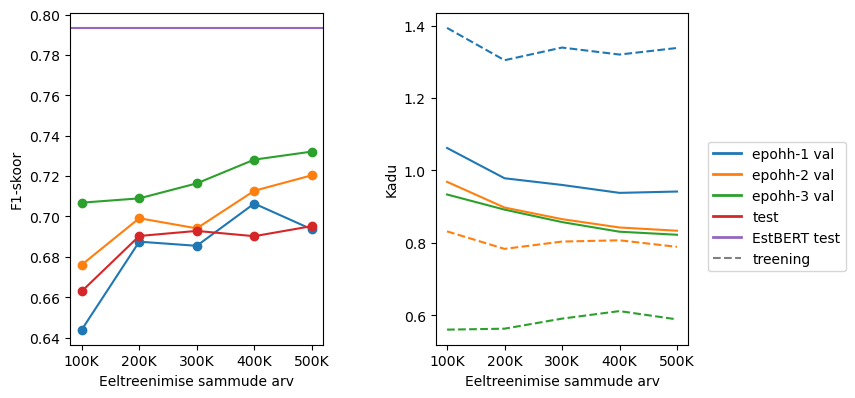

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'gray']

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax1.plot(epohh_data.Mudel, epohh_data.F1, label = epohh, marker='o', c = colors[i])

estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "test")]
ax1.axhline(y=float(estbert_data.F1), color='tab:purple', label = "EstBERT test")

ax1.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")

for i, epohh in enumerate(data.Epohh.unique()):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax2.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh, linestyle = "--", c = colors[i])
    ax2.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh, c = colors[i])
    
#estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax2.axhline(y=float(estbert_data.Val_kadu), color='tab:purple', label = "EstBERT")

ax2.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")


lines = [Line2D([0], [0], color=c, linewidth=2) if c != 'gray' else
Line2D([0], [0], color=c, linewidth=1.5, linestyle = "--") for c in colors ]
labels = ['epohh-1 val', 'epohh-2 val', 'epohh-3 val', 'test', 'EstBERT test', 'treening']

ax2.legend(lines, labels, loc = "lower right", bbox_to_anchor = (1.65, 0.2))

#plt.savefig('Rubric_kohandamine.JPG')
plt.show()

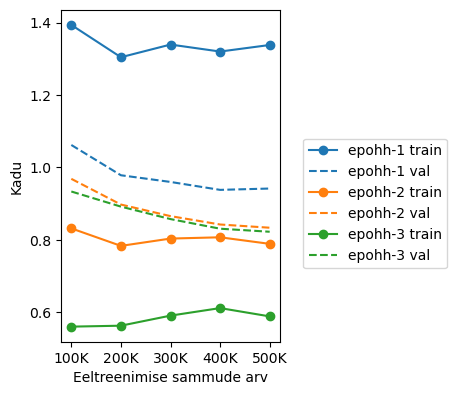

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
fig.tight_layout(pad=5.0)

colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, epohh in enumerate(data.Epohh.unique()[:-1]):
    epohh_data = data[data.Epohh == epohh][:-1]
    ax.plot(epohh_data.Mudel, epohh_data.Train_kadu, label = epohh + " train", marker='o', c = colors[i])
    ax.plot(epohh_data.Mudel, epohh_data.Val_kadu, label = epohh + " val", linestyle = "--",  c = colors[i])
    
estbert_data = data[(data.Mudel == "EstBERT") & (data.Epohh == "epohh-3")]
#ax.axhline(y=float(estbert_data.Train_kadu), color='gray', label = "EstBERT train")
#ax.axhline(y=float(estbert_data.Val_kadu), color='gray', linestyle='--', label = "EstBERT val")

ax.set(xlabel="Eeltreenimise sammude arv", ylabel="Kadu")

ax.legend(loc = "lower right", bbox_to_anchor = (1.8, 0.2))

#plt.savefig('Rubric_kohandamine.JPG')
plt.show()

In [26]:
data2 = data[data.Epohh == "test"].reset_index(drop = True)

X = list(range(200000, 600000, 100000))
Y = list(data2.F1)[1:-1]

a, b = np.polyfit(X, Y, 1)

for i in list(range(600000, 1600000, 100000)):
    data2.loc[len(data2)] = [str(int(i/1000)) + "K", "","" ,"" , "", a*i + b , "", "test"]

In [27]:
data2

,Mudel,Train_kadu,Val_kadu,Precision,Recall,F1,Accuracy,Epohh
0,100K,NaN,NaN,0.67171,0.658442,0.662943,0.658441558,test
1,200K,NaN,NaN,0.698992,0.685714,0.690317,0.685714286,test
2,300K,NaN,NaN,0.700289,0.688312,0.692821,0.688311688,test
3,400K,NaN,NaN,0.704663,0.683117,0.690204,0.683116883,test
4,500K,NaN,NaN,0.705762,0.68961,0.695193,0.68961039,test
5,EstBERT,NaN,NaN,0.794176,0.793506,0.793383,0.793506494,test
6,600K,,,,,0.695136,,test
7,700K,,,,,0.696337,,test
8,800K,,,,,0.697538,,test
9,900K,,,,,0.698739,,test


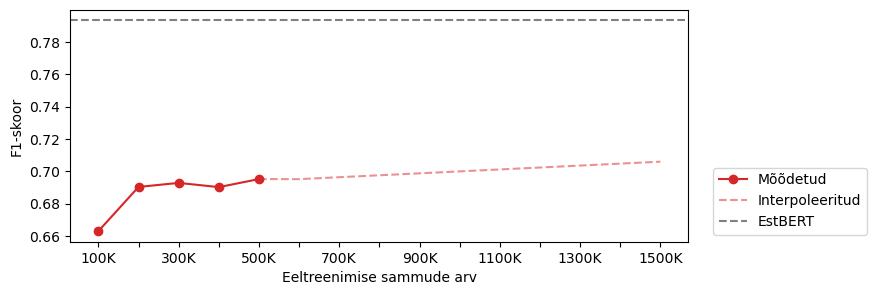

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fig.tight_layout(pad=5.0)


epohh_data = data2[(data2.Mudel.isin(["100K", "200K", "300K", "400K", "500K"]))]
ax.plot(epohh_data.Mudel, epohh_data.F1, marker='o', label = "Mõõdetud", color = "#d62728")
    
epohh_data = data2[(~data2.Mudel.isin(["100K", "200K", "300K", "400K", "EstBERT"]))]
ax.plot(epohh_data.Mudel, epohh_data.F1, label = "Interpoleeritud", linestyle='--', color = "#d62728", alpha = 0.5)

estbert_data = data2[(data2.Mudel == "EstBERT") & (data2.Epohh == "test")]
ax.axhline(y=float(estbert_data.F1), color='gray', linestyle='--', label = "EstBERT")

ax.set(xlabel="Eeltreenimise sammude arv", ylabel="F1-skoor")

ax.legend(loc = "lower right", bbox_to_anchor = (1.3, 0))

plt.setp(ax.get_xticklabels()[1::2], visible=False)

plt.show()